# Course Work - Part 4 Classification using Artificial Neural Network
Based on TensorFlow Core Tutorials https://www.tensorflow.org/tutorials/keras/classification

In [42]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [191]:
import pandas as pd
XTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
YTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
XTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_test_all.csv')
YTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_test_all.csv')

In [192]:
XTest.shape

(3090, 2304)

In [193]:
x_train=np.reshape(np.array(XTrain), (9690,48,48))
x_test=np.reshape(np.array(XTest), (3090,48,48))
y_train=np.reshape(np.array(YTrain), -1)
y_test=np.reshape(np.array(YTest), -1)

In [194]:
y_test.shape

(3090,)

In [199]:
class_names = ['Speed 20', 'Speed 30', 'Speed 50', 'Speed 60', 'Speed 70',
               'Left Turn', 'Right Turn', 'Beware Pedestrian Crossing', 'Beware Children', 'Beware Cycle Route Ahead']

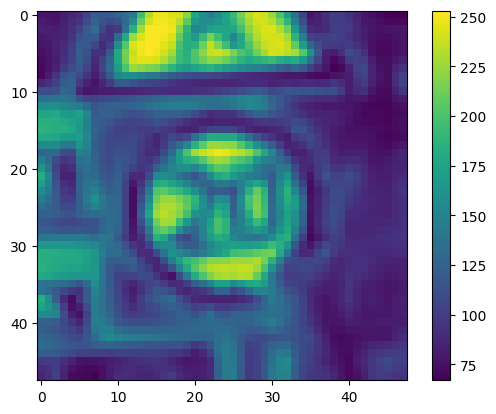

In [49]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
print(y_train[0])

0


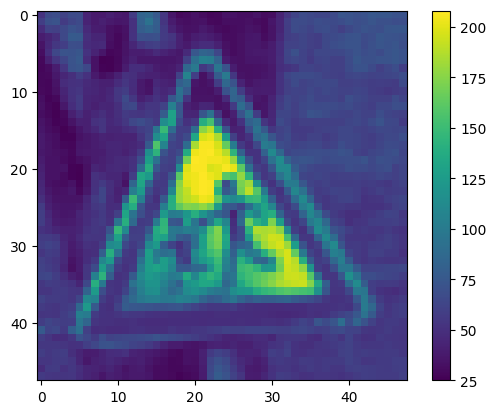

In [203]:
plt.imshow(x_train[8990])
plt.colorbar()
plt.grid(False)

In [31]:
print(x_train[2])

[[ 72.  75.  79. ...  76.  70.  65.]
 [ 70.  73.  77. ...  78.  73.  69.]
 [ 68.  71.  76. ...  79.  76.  74.]
 ...
 [119. 116. 113. ...  79.  86.  92.]
 [ 95.  96.  98. ...  80.  88.  94.]
 [ 77.  81.  86. ...  80.  89.  95.]]


In [52]:
print(y_train[2])

0


# Normalizing

In [81]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

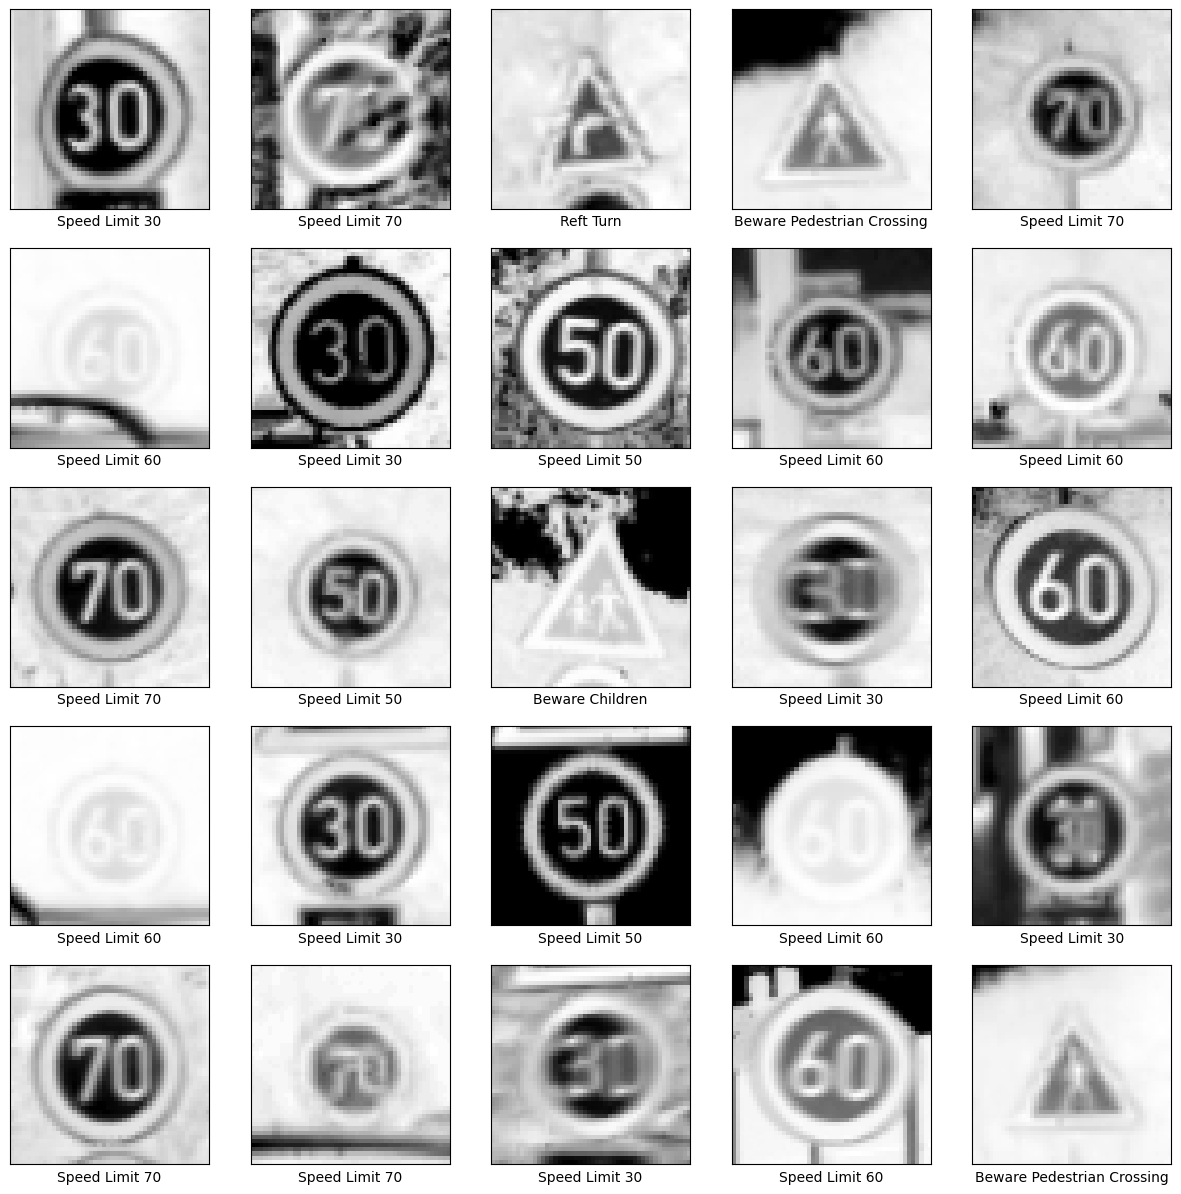

In [198]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [84]:
x_test.shape #28*28=784

(3090, 48, 48)

# Building an ANN model

In [85]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your data (X) and labels (y)
X = x_train
y = y_train
X = np.reshape(X, (X.shape[0], -1))
y.shape

(9690,)

# Testing with Train Test Split

In [210]:
def runMLP(X_train, X_test, y_train, y_test):
    # Standardize the data (optional but often beneficial)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build the MLP model
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Adjust the output layer based on the number of classes

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_accuracy}')


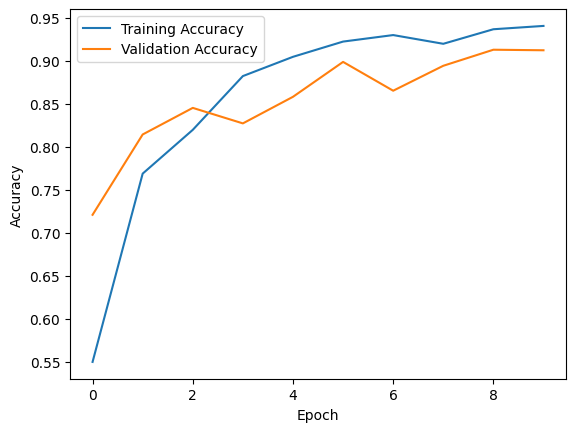

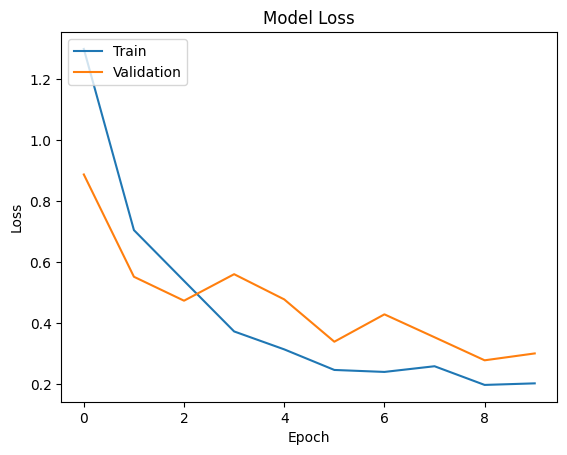

In [211]:

    # Plot training history (optional)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
     # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [212]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
runMLP(X_train, X_test, Y_train, Y_test)

Epoch 1/10
194/194 [==============================] - 2s 7ms/step - loss: 1.2632 - accuracy: 0.5602 - val_loss: 0.8182 - val_accuracy: 0.7389
Epoch 2/10
194/194 [==============================] - 2s 11ms/step - loss: 0.7238 - accuracy: 0.7587 - val_loss: 0.7108 - val_accuracy: 0.7427
Epoch 3/10
194/194 [==============================] - 1s 6ms/step - loss: 0.4560 - accuracy: 0.8481 - val_loss: 0.6130 - val_accuracy: 0.8246
Epoch 4/10
194/194 [==============================] - 1s 8ms/step - loss: 0.4028 - accuracy: 0.8657 - val_loss: 0.3643 - val_accuracy: 0.8910
Epoch 5/10
194/194 [==============================] - 1s 7ms/step - loss: 0.2891 - accuracy: 0.9142 - val_loss: 0.3867 - val_accuracy: 0.8827
Epoch 6/10
194/194 [==============================] - 1s 6ms/step - loss: 0.3410 - accuracy: 0.8932 - val_loss: 0.4029 - val_accuracy: 0.8904
Epoch 7/10
194/194 [==============================] - 1s 6ms/step - loss: 0.2409 - accuracy: 0.9268 - val_loss: 0.3395 - val_accuracy: 0.8885
Epoch

In [214]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD  # Import SGD optimizer

In [215]:
def create_mlp_model(hidden_layer_sizes=(128,), activation='relu', learning_rate=0.01, momentum=0.9):
    model = Sequential()
    for units in hidden_layer_sizes:
        model.add(Dense(units, activation=activation))
    model.add(Dense(10, activation='softmax'))  # Adjust the output layer based on the number of classes

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [216]:
def runMLPWithParam(X_train, X_test, y_train, y_test,model, epoch):
    # Standardize the data (optional but often beneficial)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, validation_split=0.2)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('-----------------------------')
    print(f'Test Accuracy: {test_accuracy}')

    # Plot training history (optional)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Define hyperparameters to experiment with
hyperparameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1],
    'momentum': [0.9, 0.95, 0.99],
    'epochs': [10, 20, 30]
}

In [217]:
x_train=np.reshape(np.array(XTrain), (9690,48,48))
x_test=np.reshape(np.array(XTest), (3090,48,48))
y_train=np.reshape(np.array(YTrain), -1)
y_test=np.reshape(np.array(YTest), -1)
x_train  = x_train / 255.0
x_test = x_test / 255.0
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

# Relu - Increased momentum results in poor accuracy

Epoch 1/10
243/243 [==============================] - 2s 6ms/step - loss: 10.2456 - accuracy: 0.3692 - val_loss: 756.8472 - val_accuracy: 0.0284
Epoch 2/10
243/243 [==============================] - 1s 4ms/step - loss: 1171.0947 - accuracy: 0.3994 - val_loss: 38886.7422 - val_accuracy: 0.0031
Epoch 3/10
243/243 [==============================] - 1s 3ms/step - loss: 245339.7031 - accuracy: 0.3493 - val_loss: 5143457.5000 - val_accuracy: 0.1192
Epoch 4/10
243/243 [==============================] - 1s 3ms/step - loss: 40951484.0000 - accuracy: 0.3168 - val_loss: 1591753344.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
243/243 [==============================] - 1s 3ms/step - loss: 1940489984.0000 - accuracy: 0.3286 - val_loss: 91001913344.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
243/243 [==============================] - 1s 3ms/step - loss: 46745333760.0000 - accuracy: 0.3719 - val_loss: 2234436288512.0000 - val_accuracy: 0.0052
Epoch 7/10
243/243 [==============================] - 1s 4ms/s

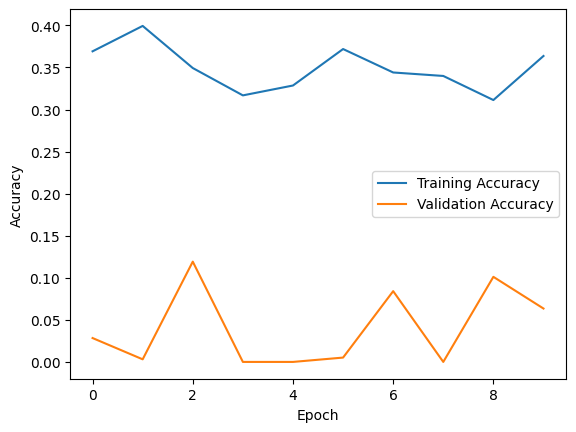

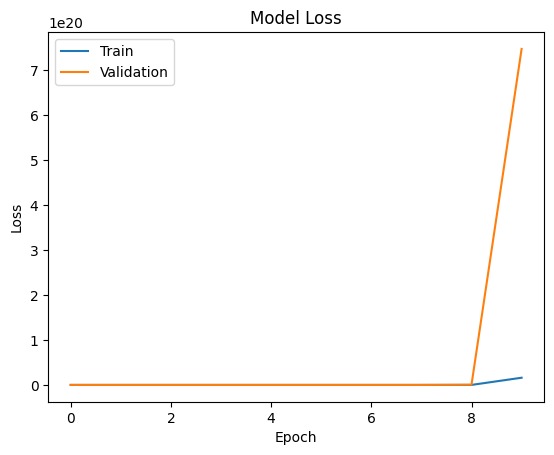

In [232]:
hidden_layer_sizes=(5,)
activation='relu'
learning_rate=0.01
momentum=0.99
epochs = 10
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)

# Relu - High learning rate produces high loss, poor accuracy

Epoch 1/10
243/243 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.2558 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
243/243 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0271 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
243/243 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0271 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
243/243 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0271 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
243/243 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0271 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
243/243 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0271 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
243/243 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0271 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/10
243/243 [

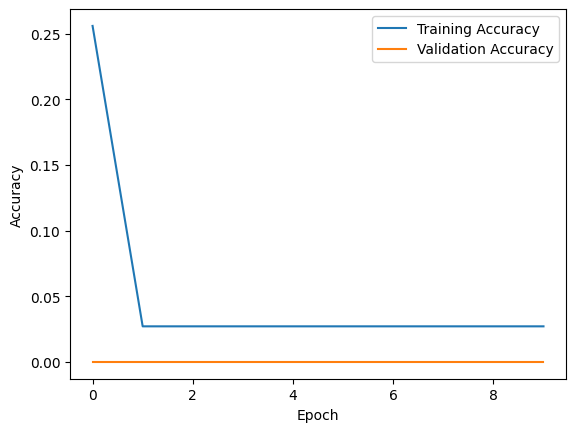

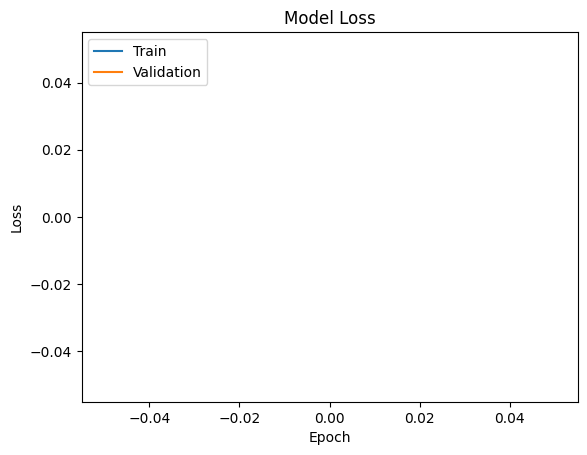

In [234]:
hidden_layer_sizes=(5,)
activation='relu'
learning_rate=0.1
momentum=0.9
epochs = 10
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)

# Increasing the no. of epochs above 10, does not make considerable difference in accuracy, but brings high loss

Epoch 1/20
243/243 [==============================] - 2s 5ms/step - loss: 1.8552 - accuracy: 0.4412 - val_loss: 2.7610 - val_accuracy: 0.0588
Epoch 2/20
243/243 [==============================] - 1s 4ms/step - loss: 1.1677 - accuracy: 0.6588 - val_loss: 2.9775 - val_accuracy: 0.1213
Epoch 3/20
243/243 [==============================] - 1s 4ms/step - loss: 0.8171 - accuracy: 0.7659 - val_loss: 3.2794 - val_accuracy: 0.1233
Epoch 4/20
243/243 [==============================] - 1s 5ms/step - loss: 0.6129 - accuracy: 0.8299 - val_loss: 3.6143 - val_accuracy: 0.1388
Epoch 5/20
243/243 [==============================] - 1s 4ms/step - loss: 0.4735 - accuracy: 0.8660 - val_loss: 3.6033 - val_accuracy: 0.1491
Epoch 6/20
243/243 [==============================] - 1s 5ms/step - loss: 0.4010 - accuracy: 0.8883 - val_loss: 3.7421 - val_accuracy: 0.1512
Epoch 7/20
243/243 [==============================] - 1s 5ms/step - loss: 0.3435 - accuracy: 0.9036 - val_loss: 3.9302 - val_accuracy: 0.1517
Epoch 

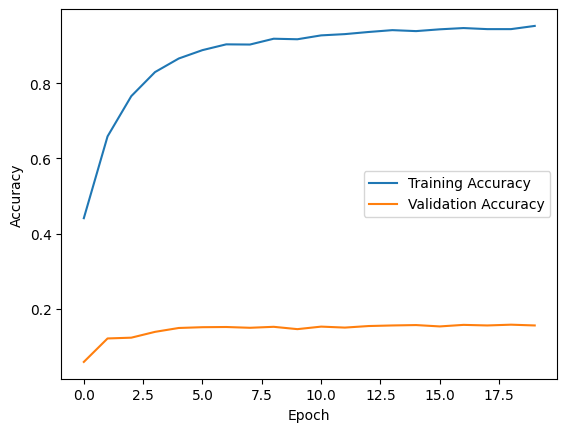

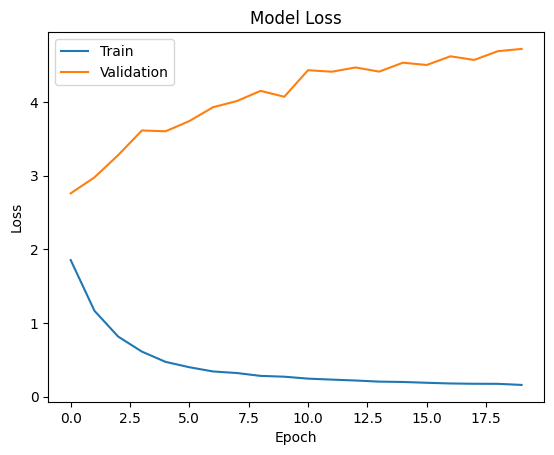

In [235]:
hidden_layer_sizes=(5,)
activation='relu'
learning_rate=0.001
momentum=0.9
epochs = 20
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)


# Relu - Best Results at Epoch 8, Hidden layers 5, Learnin Rate =0.001, Momentum = 0.9

Epoch 1/8
243/243 [==============================] - 2s 6ms/step - loss: 1.4062 - accuracy: 0.5212 - val_loss: 3.4799 - val_accuracy: 0.1342
Epoch 2/8
243/243 [==============================] - 1s 6ms/step - loss: 0.9025 - accuracy: 0.6878 - val_loss: 3.8981 - val_accuracy: 0.1207
Epoch 3/8
243/243 [==============================] - 1s 5ms/step - loss: 0.7501 - accuracy: 0.7314 - val_loss: 4.0251 - val_accuracy: 0.1326
Epoch 4/8
243/243 [==============================] - 2s 7ms/step - loss: 0.6603 - accuracy: 0.7577 - val_loss: 4.0941 - val_accuracy: 0.1398
Epoch 5/8
243/243 [==============================] - 1s 4ms/step - loss: 0.5989 - accuracy: 0.7812 - val_loss: 4.3351 - val_accuracy: 0.1347
Epoch 6/8
243/243 [==============================] - 1s 4ms/step - loss: 0.5463 - accuracy: 0.8068 - val_loss: 4.3653 - val_accuracy: 0.1218
Epoch 7/8
243/243 [==============================] - 1s 4ms/step - loss: 0.4922 - accuracy: 0.8319 - val_loss: 4.5505 - val_accuracy: 0.1455
Epoch 8/8
97/

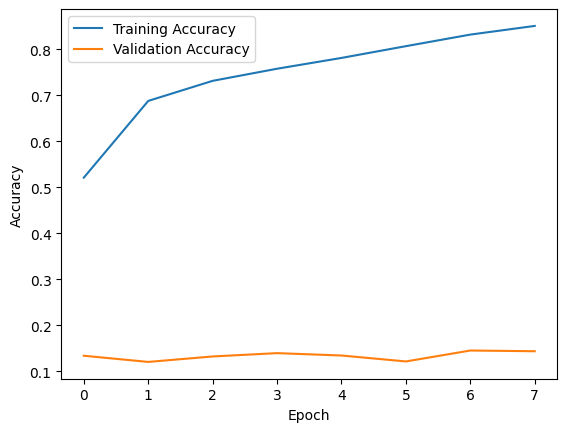

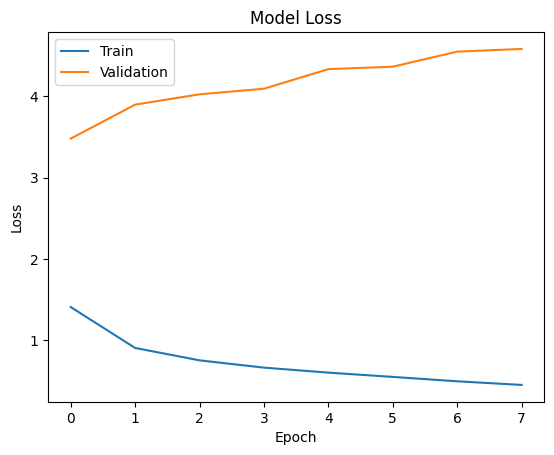

In [241]:
hidden_layer_sizes=(5,)
activation='relu'
learning_rate=0.001
momentum=0.9
epochs = 8
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)

# Activation Function as tanh

Epoch 1/8
243/243 [==============================] - 3s 7ms/step - loss: 1.8347 - accuracy: 0.4494 - val_loss: 2.4815 - val_accuracy: 0.1316
Epoch 2/8
243/243 [==============================] - 1s 4ms/step - loss: 1.2911 - accuracy: 0.6801 - val_loss: 2.6835 - val_accuracy: 0.1460
Epoch 3/8
243/243 [==============================] - 1s 5ms/step - loss: 0.9691 - accuracy: 0.7624 - val_loss: 2.8552 - val_accuracy: 0.0939
Epoch 4/8
243/243 [==============================] - 1s 5ms/step - loss: 0.7581 - accuracy: 0.8252 - val_loss: 3.0160 - val_accuracy: 0.1486
Epoch 5/8
243/243 [==============================] - 1s 5ms/step - loss: 0.6335 - accuracy: 0.8435 - val_loss: 3.0468 - val_accuracy: 0.1548
Epoch 6/8
243/243 [==============================] - 1s 4ms/step - loss: 0.5281 - accuracy: 0.8735 - val_loss: 3.2454 - val_accuracy: 0.1553
Epoch 7/8
243/243 [==============================] - 1s 4ms/step - loss: 0.4750 - accuracy: 0.8787 - val_loss: 3.4092 - val_accuracy: 0.1579
Epoch 8/8
97/

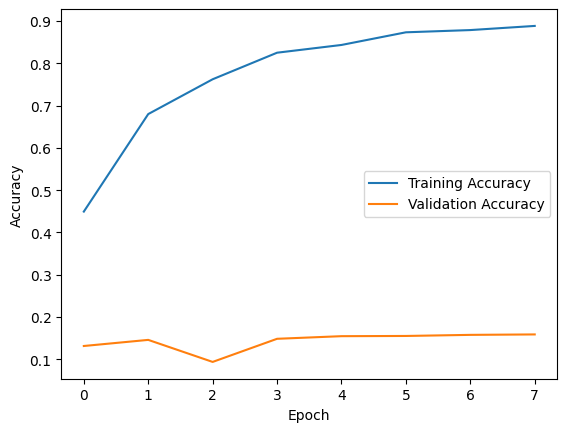

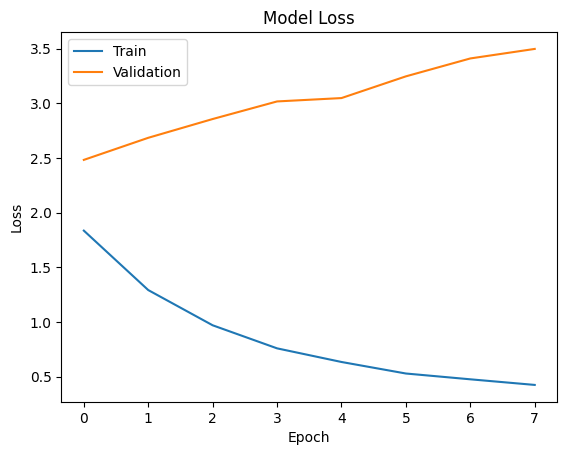

In [242]:
hidden_layer_sizes=(5,)
activation='tanh'
learning_rate=0.001
momentum=0.9
epochs = 8
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)

Epoch 1/8
243/243 [==============================] - 2s 5ms/step - loss: 2.0847 - accuracy: 0.2420 - val_loss: 2.6376 - val_accuracy: 0.0026
Epoch 2/8
243/243 [==============================] - 1s 3ms/step - loss: 1.6344 - accuracy: 0.4134 - val_loss: 2.9430 - val_accuracy: 0.0289
Epoch 3/8
243/243 [==============================] - 1s 4ms/step - loss: 1.4395 - accuracy: 0.5546 - val_loss: 3.1288 - val_accuracy: 0.1156
Epoch 4/8
243/243 [==============================] - 1s 4ms/step - loss: 1.3191 - accuracy: 0.6471 - val_loss: 3.2589 - val_accuracy: 0.1326
Epoch 5/8
243/243 [==============================] - 1s 4ms/step - loss: 1.2240 - accuracy: 0.6979 - val_loss: 3.3742 - val_accuracy: 0.1115
Epoch 6/8
243/243 [==============================] - 1s 6ms/step - loss: 1.1393 - accuracy: 0.7544 - val_loss: 3.4594 - val_accuracy: 0.1419
Epoch 7/8
243/243 [==============================] - 1s 6ms/step - loss: 1.0628 - accuracy: 0.7851 - val_loss: 3.5698 - val_accuracy: 0.1367
Epoch 8/8
97/

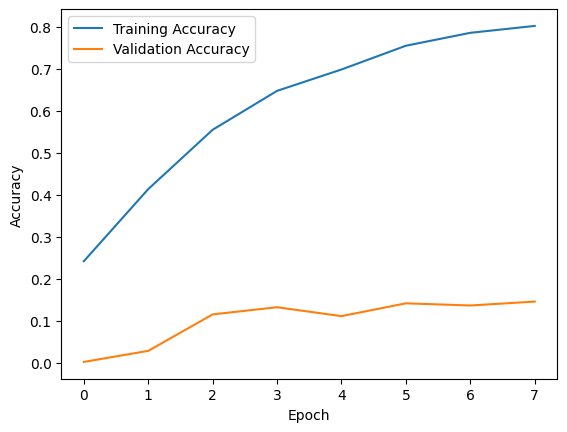

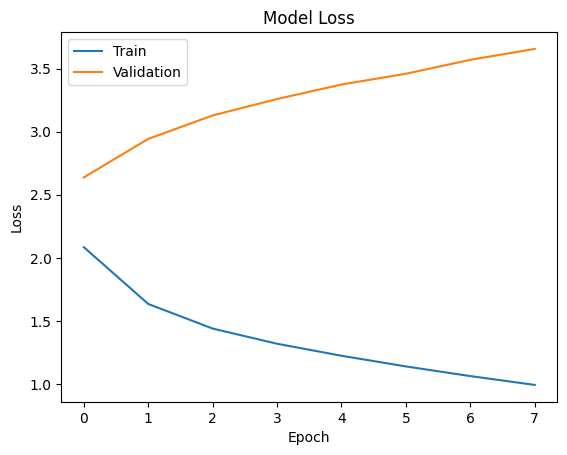

In [243]:
hidden_layer_sizes=(5,)
activation='sigmoid'
learning_rate=0.001
momentum=0.9
epochs = 8
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)

Epoch 1/6
243/243 [==============================] - 3s 7ms/step - loss: 1.1212 - accuracy: 0.5903 - val_loss: 7.9380 - val_accuracy: 0.0733
Epoch 2/6
243/243 [==============================] - 1s 6ms/step - loss: 0.5879 - accuracy: 0.7862 - val_loss: 11.3750 - val_accuracy: 0.1512
Epoch 3/6
243/243 [==============================] - 3s 14ms/step - loss: 0.4374 - accuracy: 0.8446 - val_loss: 11.8338 - val_accuracy: 0.1491
Epoch 4/6
243/243 [==============================] - 2s 7ms/step - loss: 0.4547 - accuracy: 0.8422 - val_loss: 12.9497 - val_accuracy: 0.1594
Epoch 5/6
243/243 [==============================] - 1s 4ms/step - loss: 0.3256 - accuracy: 0.8845 - val_loss: 12.1311 - val_accuracy: 0.1465
Epoch 6/6
97/97 [==============================] - 1s 6ms/step - loss: 3.0886 - accuracy: 0.7142
-----------------------------
Test Accuracy: 0.7142394781112671


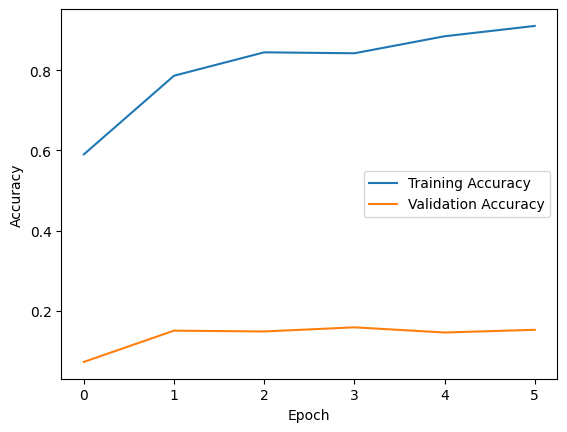

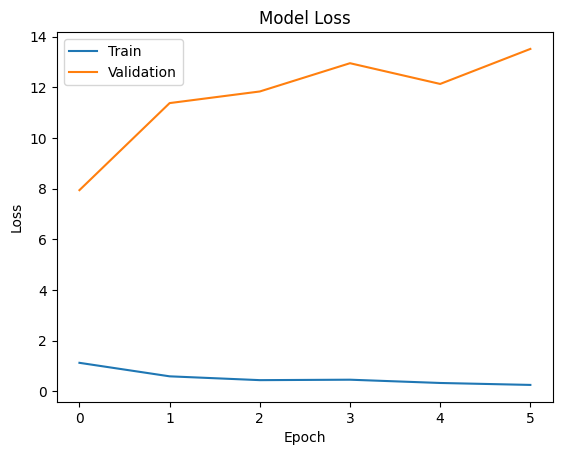

In [146]:
hidden_layer_sizes=(10,)
activation='relu'
learning_rate=0.01
momentum=0.9
epochs = 6
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)

# Evaluate

In [148]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print('\nTest accuracy:', test_acc)

97/97 [==============================] - 0s 3ms/step - loss: 2.6548 - accuracy: 0.4100

Test accuracy: 0.41003236174583435


verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar.

# Prediction

In [157]:
classifications = model.predict(x_test)

97/97 [==============================] - 0s 2ms/step


In [151]:
print(classifications[10])


[1.2091492e-02 7.8084630e-01 1.2594305e-01 3.5964994e-04 7.9949312e-02
 8.9199079e-05 3.0553367e-04 4.9641891e-05 6.6480156e-05 2.9947684e-04]


In [180]:
np.argmax(classifications[0])

1

In [181]:
np.max(classifications[0])

0.70537484

In [183]:
class_names[np.argmax(classifications[0])]

'Speed Limit 30'

In [185]:
X_Test_Sample=np.reshape(np.array(XTest), (3090,48,48))
Y_Test_Sample=np.reshape(np.array(YTest), -1)

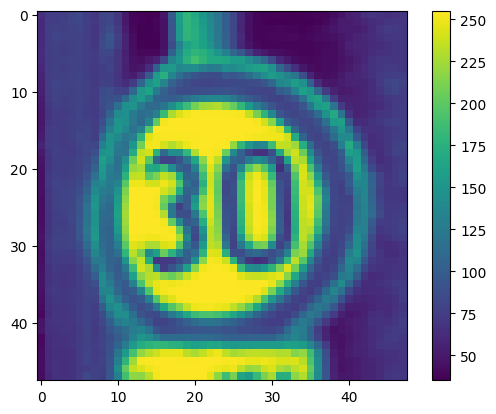

In [186]:
plt.imshow(X_Test_Sample[0])
plt.colorbar()
plt.grid(False)

In [174]:
def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [175]:
def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

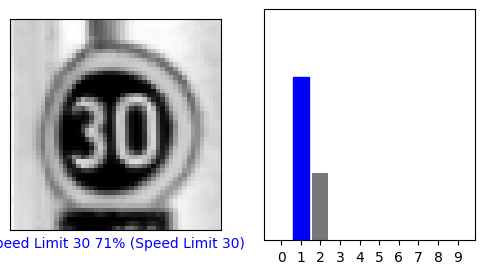

In [177]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  Y_Test_Sample)
plt.show()

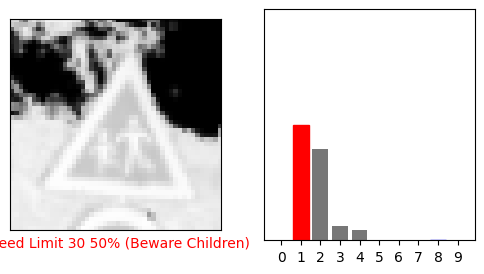

In [179]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  Y_Test_Sample)
plt.show()

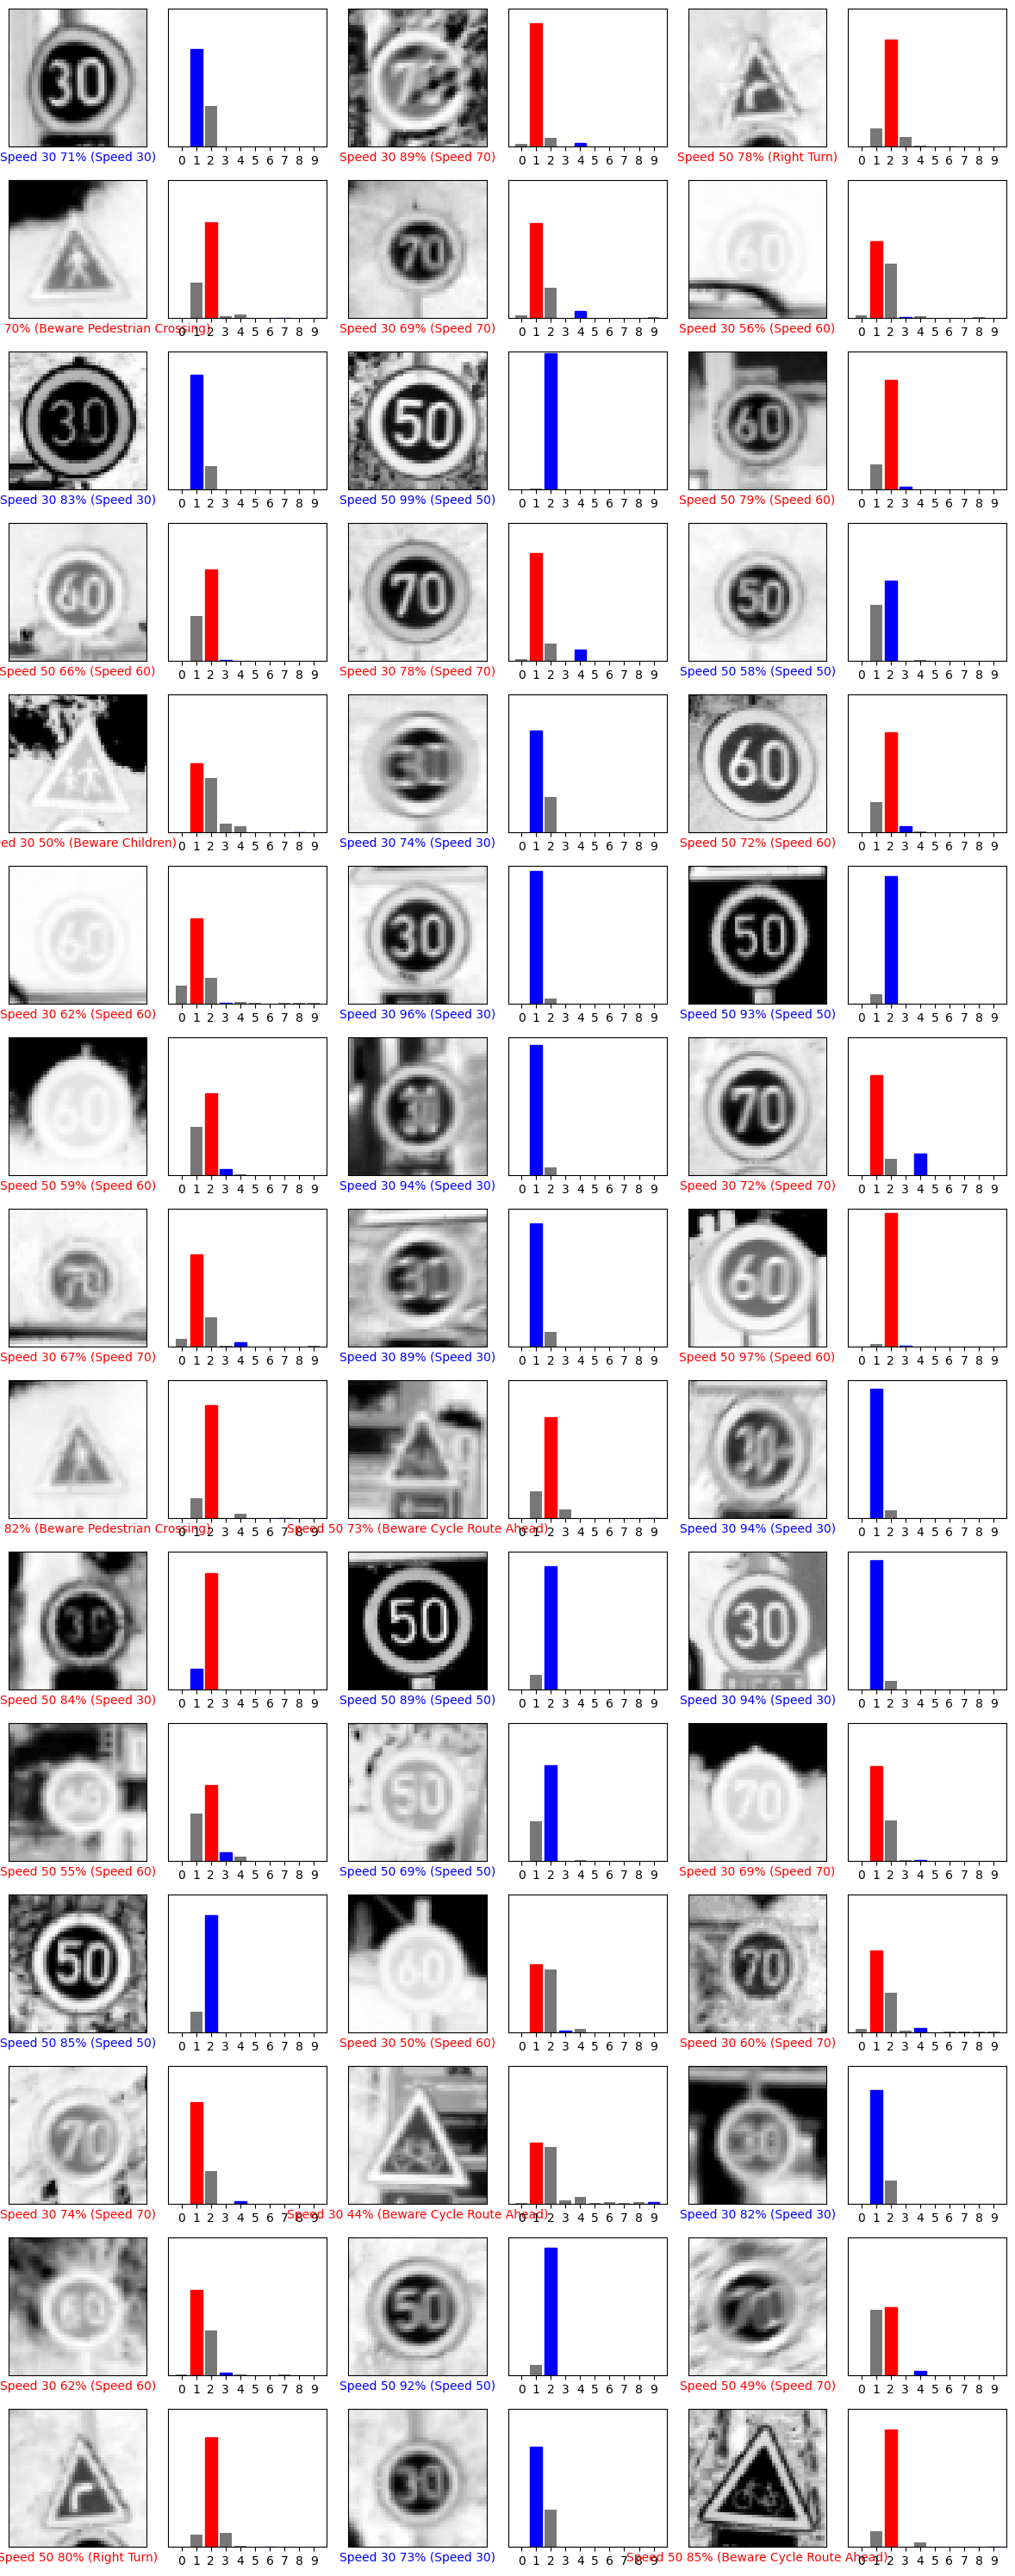

In [200]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], Y_Test_Sample)
plt.tight_layout()
plt.show()